In [17]:
import plot
import pandas as pd
import numpy as np
csv_flies = './results/calibrated_RF_baseline_eRASS1.csv'
csv_data = pd.read_csv(csv_flies)
col_names = [f'prob_C{i+3}' for i in range(13)]
max_pro = np.max(csv_data[col_names].values, axis=-1)
prob_thr = 0.25
mask = (max_pro>= prob_thr)
#csv_data = []
csv_data = csv_data[mask]
plot.plot_corner(csv_data, ref_point='None', test_set='test_0.25_cutoff', fname='calibrated_RF_baseline_cutoff', show_ref=False, show_cos_name=False, show_pdf=False, show_datapoint=False)

In [1]:
import data_preprocessing
from astropy.table import Table
#mr_simualtion = data_preprocessing.read_corrected_data()
mr_simualtion = data_preprocessing.read_15mr_simulation()
column_rangs = {'R500_kpc':[], 'Mgas500':[], 'Lbol500':[], 'T500':[], 'z':[]}
column_rangs = data_preprocessing.filter_setting(column_rangs, mr_simualtion)
mr_simualtion =  data_preprocessing.data_cleaning(mr_simualtion, column_rangs)
#mr_simualtion = Table.from_pandas(mr_simualtion)

simulation name: mr_0.153_0.0408_0.614_0.666, label: C1
simulation name: mr_0.189_0.0455_0.697_0.703, label: C2
simulation name: mr_0.200_0.0415_0.850_0.730, label: C3
simulation name: mr_0.204_0.0437_0.739_0.689, label: C4
simulation name: mr_0.222_0.0421_0.793_0.676, label: C5
simulation name: mr_0.232_0.0413_0.687_0.670, label: C6
simulation name: mr_0.268_0.0449_0.721_0.699, label: C7
simulation name: mr_0.272_0.0456_0.809_0.704, label: C8
simulation name: mr_0.301_0.0460_0.824_0.707, label: C9
simulation name: mr_0.304_0.0504_0.886_0.740, label: C10
simulation name: mr_0.342_0.0462_0.834_0.708, label: C11
simulation name: mr_0.363_0.0490_0.884_0.729, label: C12
simulation name: mr_0.400_0.0485_0.650_0.675, label: C13
simulation name: mr_0.406_0.0466_0.867_0.712, label: C14
simulation name: mr_0.428_0.0492_0.830_0.732, label: C15


In [2]:
import model_new, sample_boosting, plot

resample_mr_simualtion = sample_boosting.simulation_boosting(mr_simualtion, int(1e5), column_rangs, noise_level=0.05, ramdom_seed=42)
resample_mr_simualtion = model_new.pre_selection(resample_mr_simualtion)
randomforest = model_new.RandomForest()
randomforest.config['model_name'] = 'test_corrected'
train_data, valid_data = model_new.data_split(resample_mr_simualtion)
randomforest.train_data = train_data
randomforest.config['input_column_rangs'] = column_rangs
randomforest.training()
randomforest.test_data = valid_data
results = randomforest.points(show_acc=True)
ture_label = randomforest.test_data['label'].values
plot.plot_corner(results, ref_point='C8', test_set='testing_set', fname='test_correcte',show_ref=False, show_cos_name=False)
plot.plot_confusion_matrix(ture_label, results, title='test_correcte')

C1 1238
C10 39869
C11 43924
C12 57978
C13 21043
C14 70221
C15 64299
C2 4761
C3 15183
C4 8610
C5 15710
C6 8033
C7 13454
C8 23900
C9 32237
Num of x_train 1170000, number of y_train 1170000
training finished!
{'bin_num': 5,
 'class_weight': 'balanced',
 'cosmology_label': ['C3',
                     'C4',
                     'C5',
                     'C6',
                     'C7',
                     'C8',
                     'C9',
                     'C10',
                     'C11',
                     'C12',
                     'C13',
                     'C14',
                     'C15'],
 'cosmology_para': [[0.2, 0.85, 0.73, 0.0415],
                    [0.204, 0.739, 0.689, 0.0437],
                    [0.222, 0.793, 0.676, 0.0421],
                    [0.232, 0.687, 0.67, 0.0413],
                    [0.268, 0.721, 0.699, 0.0449],
                    [0.272, 0.809, 0.704, 0.0456],
                    [0.301, 0.824, 0.707, 0.046],
                    [0.304, 0.886, 0.74, 

In [3]:
eFEDS_cat2, eROSTA_DR1 = data_preprocessing.read_observed_data()
cleaned_eROSTA_DR1 =  data_preprocessing.data_cleaning(eROSTA_DR1, column_rangs)
vars_name = ['R500_kpc', 'Mgas500', 'Lbol500', 'T500', 'z'] # estimate value
up_error  = [1e-2, 'E_Mgas500', 'E_Lbol500', 'E_T500', 1e-2] # error bar
down_error= [1e-2, 'e_Mgas500', 'e_Lbol500', 'e_T500', 1e-2]
boosted_eROSTA_DR1, boost_DR1 = sample_boosting.Boosting(cleaned_eROSTA_DR1, vars_name, up_error, down_error, num=1000, dis_type='log_normal')
catalog_name = 'test_dr1'
randomforest.test_data = boost_DR1
results = randomforest.points(output_name=catalog_name, show_acc=True)
plot.plot_corner(results, ref_point='C8', test_set=catalog_name, fname='test_'+catalog_name,show_ref=False, show_cos_name=False)
constrain_value = plot.get_expectation_1sigam(results, 'test', catalog_name)

Mgas500 has error measurement
Lbol500 has error measurement
T500 has error measurement
{'bin_num': 5,
 'class_weight': 'balanced',
 'cosmology_label': ['C3',
                     'C4',
                     'C5',
                     'C6',
                     'C7',
                     'C8',
                     'C9',
                     'C10',
                     'C11',
                     'C12',
                     'C13',
                     'C14',
                     'C15'],
 'cosmology_para': [[0.2, 0.85, 0.73, 0.0415],
                    [0.204, 0.739, 0.689, 0.0437],
                    [0.222, 0.793, 0.676, 0.0421],
                    [0.232, 0.687, 0.67, 0.0413],
                    [0.268, 0.721, 0.699, 0.0449],
                    [0.272, 0.809, 0.704, 0.0456],
                    [0.301, 0.824, 0.707, 0.046],
                    [0.304, 0.886, 0.74, 0.0504],
                    [0.342, 0.834, 0.708, 0.0462],
                    [0.363, 0.884, 0.729, 0.049],
         

calculating the CFD of C1
calculating the CFD of C2
calculating the CFD of C3
calculating the CFD of C4
calculating the CFD of C5
calculating the CFD of C6
calculating the CFD of C7
calculating the CFD of C8
calculating the CFD of C9
calculating the CFD of C10
calculating the CFD of C11
calculating the CFD of C12
calculating the CFD of C13
calculating the CFD of C14
calculating the CFD of C15
calculating the CFD of C1
calculating the CFD of C2
calculating the CFD of C3
calculating the CFD of C4
calculating the CFD of C5
calculating the CFD of C6
calculating the CFD of C7
calculating the CFD of C8
calculating the CFD of C9
calculating the CFD of C10
calculating the CFD of C11
calculating the CFD of C12
calculating the CFD of C13
calculating the CFD of C14
calculating the CFD of C15


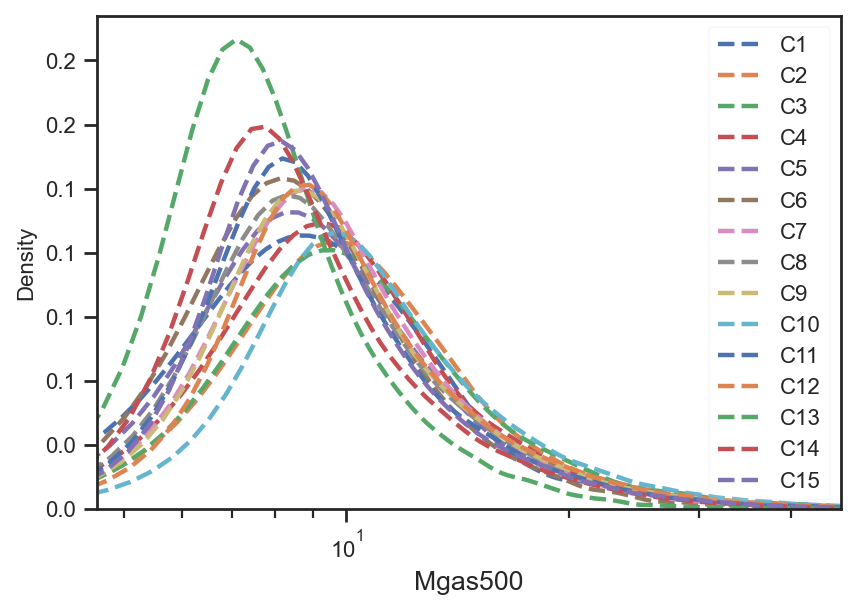

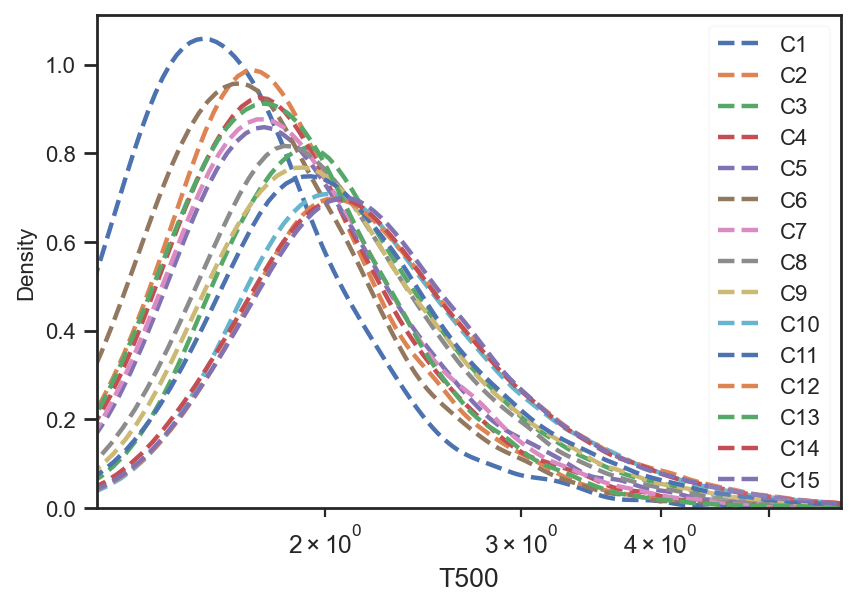

In [4]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
sns.set_theme(style="ticks", palette="deep")
            
def calculate_CFD(features, features_name):
    # calculate the CFD of each simulation
    labels = [f'C{i+1}' for i in range(15)]
    #check_points = np.linspace(min(features), max(features), 50)
    point_num = 50
    edge_percentages = np.linspace(0, 100, point_num + 1)
    check_points = [np.percentile(features, percentage) for percentage in edge_percentages]
    CFD = {}
    for label in labels:
        print(f'calculating the CFD of {label}')
        subset = mr_simualtion[(mr_simualtion['label']==label)]
        portion_point = []
        for point in check_points:
            num = sum(subset[features_name]<=point)
            portion_point.append(num)
        portion_point = np.array(portion_point)/len(subset)
        CFD[label] = portion_point
    # plot the CFD 
    fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=160)
    f_size = 10
    ax.set_xlabel(features_name)
    ax.set_ylabel('Cumulative probability', fontsize=f_size)
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f')) #Keep one decimal place
    ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f')) #Keep one decimal place
    ax.tick_params(axis='x', labelsize=f_size)
    ax.tick_params(axis='y', labelsize=f_size)
    for name, cfd in CFD.items():
        ax.plot(check_points, cfd, linewidth=2.0, alpha=1.0, label=name,linestyle='--')
    ax.legend(loc='upper right', framealpha=0.1, fontsize=f_size)
    #plt.xscale('log')
    plt.xticks(fontsize=f_size)
    plt.yticks(fontsize=f_size)
    plt.savefig(f'./figures/{features_name}_CFD.pdf', bbox_inches='tight', pad_inches=0.1)

def calculate_dist(features, features_name):
    # calculate the CFD of each simulation
    labels = [f'C{i+1}' for i in range(15)]
    fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=160)
    f_size = 10
    for label in labels:
        print(f'calculating the CFD of {label}')
        subset = mr_simualtion[(mr_simualtion['label']==label)]
        #sns.histplot(subset[features_name], bins=30, kde=True, label=label,linestyle='--')
        sns.kdeplot(subset[features_name], linewidth=2, label=label,linestyle='--')
    
    ax.set_xlabel(features_name)
    ax.set_ylabel('Density', fontsize=f_size)
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f')) #Keep one decimal place
    ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f')) #Keep one decimal place
    ax.tick_params(axis='x', labelsize=f_size)
    ax.tick_params(axis='y', labelsize=f_size)
    ax.legend(loc='upper right', framealpha=0.1, fontsize=f_size)
    x_min, x_max = np.percentile(features, 0.5), np.percentile(features, 99.5)
    ax.set_xlim(x_min, x_max)
    plt.xscale('log')
    plt.xticks(fontsize=f_size)
    plt.yticks(fontsize=f_size)
    plt.savefig(f'./figures/{features_name}_dist.pdf', bbox_inches='tight', pad_inches=0.1)

calculate_dist(mr_simualtion['Mgas500'], features_name='Mgas500')
calculate_dist(mr_simualtion['T500'], features_name='T500')

calculating the CFD of C1
calculating the CFD of C2
calculating the CFD of C3
calculating the CFD of C4
calculating the CFD of C5
calculating the CFD of C6
calculating the CFD of C7
calculating the CFD of C8
calculating the CFD of C9
calculating the CFD of C10
calculating the CFD of C11
calculating the CFD of C12
calculating the CFD of C13
calculating the CFD of C14
calculating the CFD of C15
calculating the CFD of C1
calculating the CFD of C2
calculating the CFD of C3
calculating the CFD of C4
calculating the CFD of C5
calculating the CFD of C6
calculating the CFD of C7
calculating the CFD of C8
calculating the CFD of C9
calculating the CFD of C10
calculating the CFD of C11
calculating the CFD of C12
calculating the CFD of C13
calculating the CFD of C14
calculating the CFD of C15
calculating the CFD of C1
calculating the CFD of C2
calculating the CFD of C3
calculating the CFD of C4
calculating the CFD of C5
calculating the CFD of C6
calculating the CFD of C7
calculating the CFD of C8


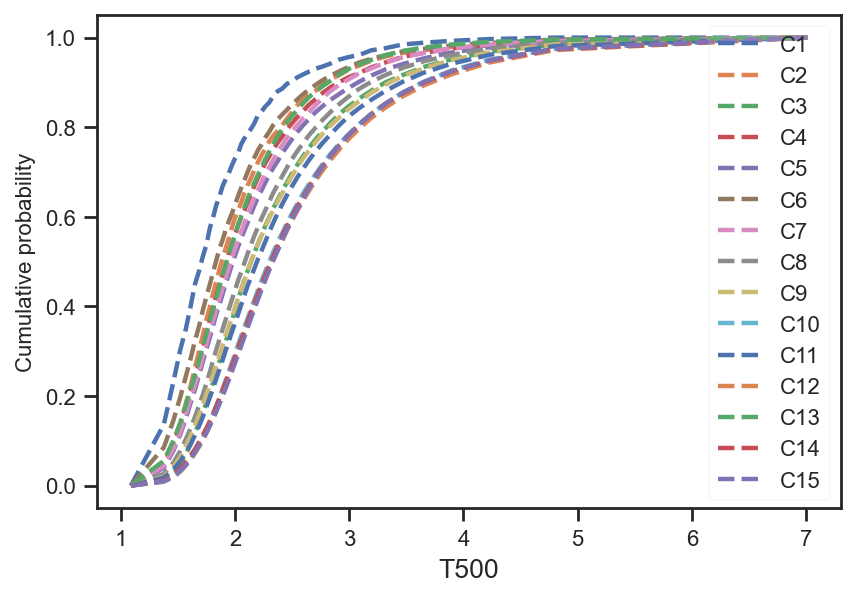

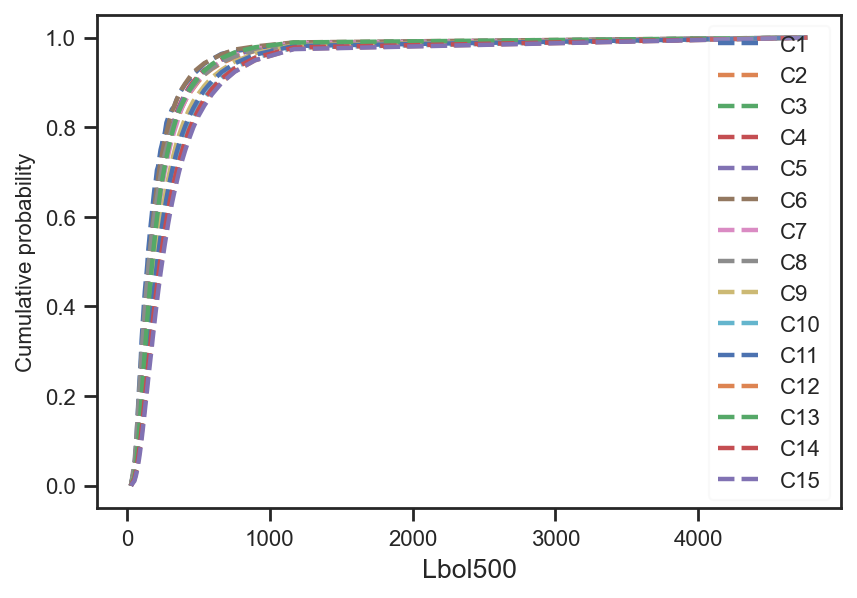

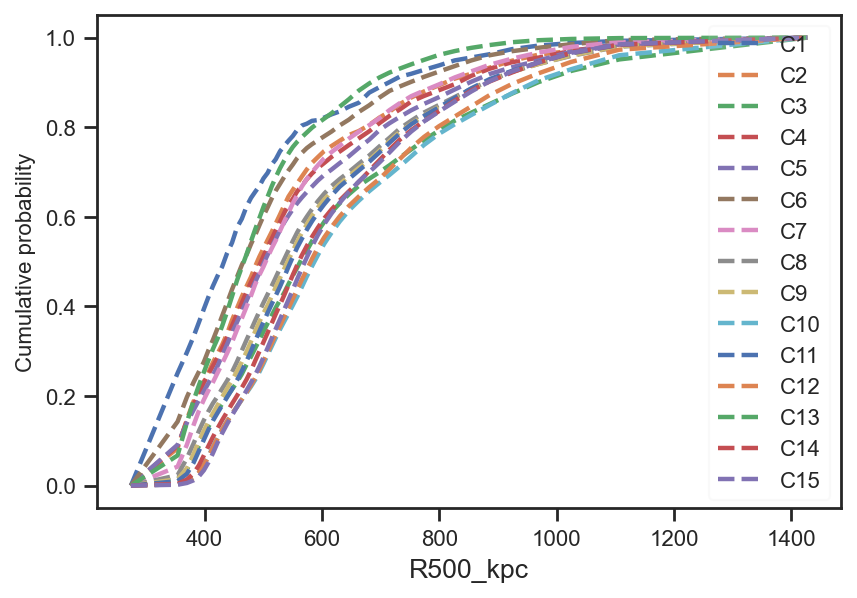

In [5]:
calculate_CFD(mr_simualtion['T500'], features_name='T500')
calculate_CFD(mr_simualtion['Lbol500'], features_name='Lbol500')
calculate_CFD(mr_simualtion['R500_kpc'], features_name='R500_kpc')

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


/Users/apple/miniconda3/lib/python3.9/site-packages/matplotlib/text.py:830: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
/Users/apple/miniconda3/lib/python3.9/site-packages/matplotlib/text.py:831: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))
/Users/apple/miniconda3/lib/python3.9/site-packages/matplotlib/text.py:690: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/Users/apple/miniconda3/lib/python3.9/site-packages/matplotlib/text.py:691: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) ins

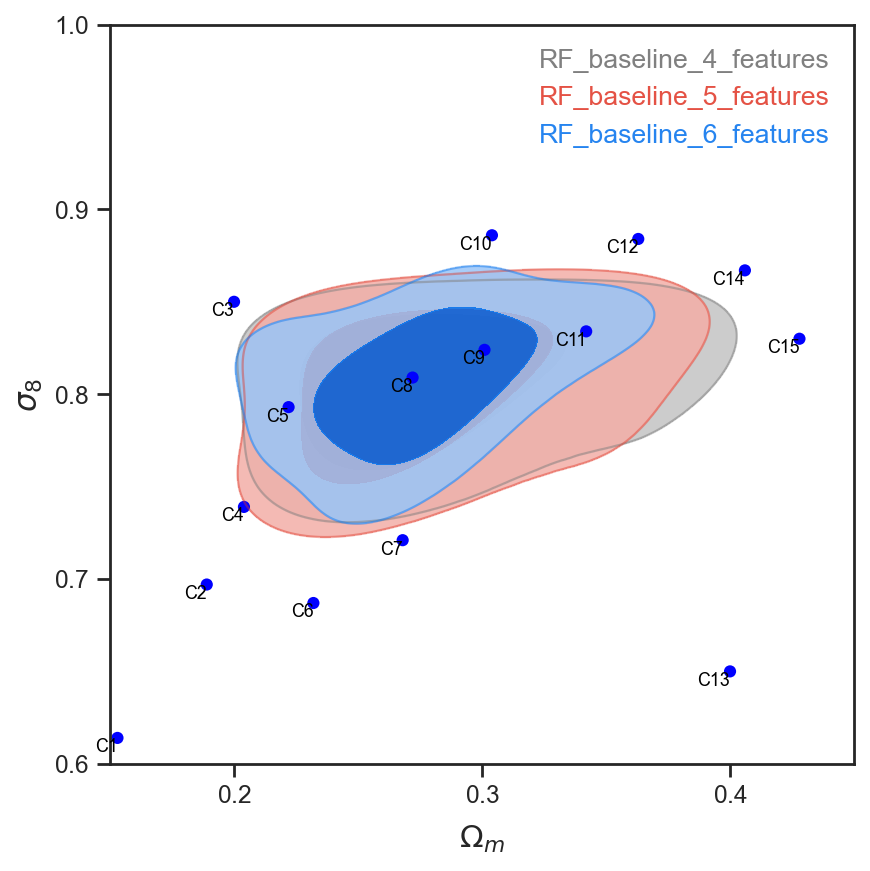

<Figure size 600x450 with 0 Axes>

In [120]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.table import Table
from getdist import plots, MCSamples
sns.set_theme(style="ticks", palette="deep")

labels = ['\Omega_m','\sigma_8']
para1, para2 = 'Omega', 'Sigm8'
limits = [0.15, 0.45, 0.6, 1.0]
para_names = [para1, para2]
sim_catalog = pd.read_csv('./simulation_paras.csv')
sim_parameters= MCSamples(samples=[sim_catalog[para1].values ,sim_catalog[para2].values], weights=np.ones_like(sim_catalog[para1].values), names=para_names, labels=labels)


test_sampels = {}
for test_name, value in test_list.items():
    data = pd.read_csv(f'./Results/{test_name}_{catalog_name}.csv')
    temp_para1, temp_para2, weights = data[para1].values, data[para2].values, data['weight'].values
    samples= MCSamples(samples=[temp_para1,temp_para2], weights=weights, names=para_names, labels=labels,
                                    settings={'smooth_scale_2D':0.7}) #smooth should be 0.3-0.7
                                    # see https://getdist.readthedocs.io/en/latest/analysis_settings.html#analysis-settings
    test_sampels[test_name] = samples


fig, ax = plt.subplots(1, 1, figsize=(6, 6), dpi=160)
g = plots.get_single_plotter()

g.plot_2d(list(test_sampels.values()), para1, para2, ax=ax, filled=True, lims=limits)
g.add_legend(list(test_sampels.keys()), colored_text=True, ax=ax, legend_loc='upper right')
g.plot_2d_scatter(sim_parameters, para1, para2, ax=ax, color='blue', scatter_size=30, lims=limits)
for i, label in enumerate(sim_catalog['name'].values):
    x = sim_catalog[sim_catalog['name'] == label][para1]
    y = sim_catalog[sim_catalog['name'] == label][para2]
    ax.text(x, y, label, fontsize=8, ha='right', va='top', color='black',alpha=1.0)
fig.savefig('./figures/Constrain_C8_test.pdf', bbox_inches='tight')

In [124]:
from run_on_observations import print_text

Joint_constraint = pd.read_csv(f'./results/Ave_Joint_constraint_calibration=0.csv')
Joint_constraint_calibrated = pd.read_csv(f'./results/Ave_Joint_constraint_calibration=1.csv')
text = ''
for row1, row2 in zip(Joint_constraint.iterrows(), Joint_constraint_calibrated.iterrows()):
    row1_text = print_text(row1)
    row2_text = print_text(row2, False)
    text = text + row1_text + row2_text + '\n'
    print(row1_text + row2_text )
with open(f"results/constraint_values_Ave_Joint.txt", "w") as file:
    file.write(text)

$Ave_{RF}$ & $0.231_{-0.014}^{+0.043}$ & $0.044_{-0.001}^{+0.002}$ &  $0.833_{-0.059}^{+0.016}$ & $0.720_{-0.021}^{+0.007}$ & $0.235_{-0.017}^{+0.131}$ & $0.044_{-0.001}^{+0.004}$ &  $0.820_{-0.058}^{+0.026}$ & $0.716_{-0.020}^{+0.009}$ \\ 
$Ave_{NB}$ & $0.244_{-0.040}^{+0.109}$ & $0.044_{-0.002}^{+0.004}$ &  $0.837_{-0.065}^{+0.030}$ & $0.723_{-0.024}^{+0.009}$ & $0.260_{-0.042}^{+0.131}$ & $0.045_{-0.002}^{+0.004}$ &  $0.824_{-0.062}^{+0.037}$ & $0.715_{-0.019}^{+0.015}$ \\ 


### Download HR data

In [ ]:
import urllib.request
import gzip
import shutil
import pandas as pd

box_name = 'Box2b_hr'
snap_list = pd.read_csv(f'./{box_name}/snap_list.csv')
print(snap_list)
# http://wwwmpa.mpa-garching.mpg.de/HydroSims/Magneticum/Downloads/Magneticum/Box2b_hr/snap_029/cluster.txt.gz
def download(snap_name, snap_z):
    url = f'http://wwwmpa.mpa-garching.mpg.de/HydroSims/Magneticum/Downloads/Magneticum/{box_name}/{snap_name}/cluster.txt.gz'
    print(url)
    tar_name = f'./{box_name}/{snap_name}_{snap_z}_cluster.txt.gz'
    out_name = tar_name.rsplit('.',1)[0]
    urllib.request.urlretrieve(url, tar_name)
    with gzip.open(tar_name, 'rb') as f_in:
        with open(out_name, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)
    # remove the '#' at first line
    with open(out_name, 'r') as file:# 读取文件
        lines = file.readlines()
    lines[0] = lines[0].lstrip('# ') # 去除第一行开头的#
    with open(out_name, 'w') as file: # 将处理后的内容写回文件
        file.writelines(lines)
    # read as csv
    data = pd.read_csv(out_name, sep='\s+', header=0, index_col=None)
    z = snap_z.rsplit(' ', 1)[-2].rsplit('=',1)[-1]
    z = float(z)
    data['z'] = z
    return data

data = []
for index, row in snap_list.iterrows():
    snap_name = row['snap_name']
    snap_z = row['redshift']
    print(snap_name,snap_z)
    snap_data = download(snap_name, snap_z)
    data.append(snap_data)
# save as csv
data = pd.concat(data)
data.to_csv(f'./{box_name}/cluster.csv')

In [10]:
import calibration, data_preprocessing
mr_simualtion = data_preprocessing.read_15mr_simulation()
calibrated_mr_simualtion = calibration.calibrate_mr_simulation(mr_simualtion, keep_origin=True)

simulation name: mr_0.153_0.0408_0.614_0.666, label: C1
simulation name: mr_0.189_0.0455_0.697_0.703, label: C2
simulation name: mr_0.200_0.0415_0.850_0.730, label: C3
simulation name: mr_0.204_0.0437_0.739_0.689, label: C4
simulation name: mr_0.222_0.0421_0.793_0.676, label: C5
simulation name: mr_0.232_0.0413_0.687_0.670, label: C6
simulation name: mr_0.268_0.0449_0.721_0.699, label: C7
simulation name: mr_0.272_0.0456_0.809_0.704, label: C8
simulation name: mr_0.301_0.0460_0.824_0.707, label: C9
simulation name: mr_0.304_0.0504_0.886_0.740, label: C10
simulation name: mr_0.342_0.0462_0.834_0.708, label: C11
simulation name: mr_0.363_0.0490_0.884_0.729, label: C12
simulation name: mr_0.400_0.0485_0.650_0.675, label: C13
simulation name: mr_0.406_0.0466_0.867_0.712, label: C14
simulation name: mr_0.428_0.0492_0.830_0.732, label: C15


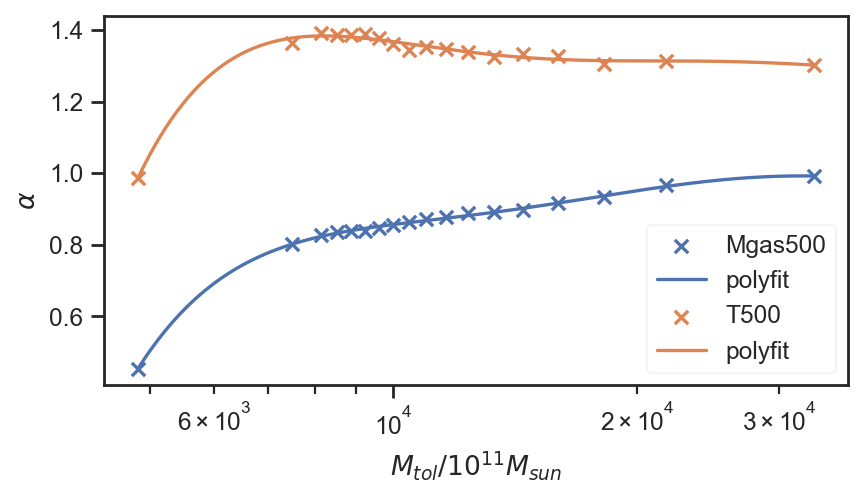

In [1]:
import calibration, data_preprocessing
calibration.plot_calibration_function()

simulation name: mr_0.153_0.0408_0.614_0.666, label: C1
simulation name: mr_0.189_0.0455_0.697_0.703, label: C2
simulation name: mr_0.200_0.0415_0.850_0.730, label: C3
simulation name: mr_0.204_0.0437_0.739_0.689, label: C4
simulation name: mr_0.222_0.0421_0.793_0.676, label: C5
simulation name: mr_0.232_0.0413_0.687_0.670, label: C6
simulation name: mr_0.268_0.0449_0.721_0.699, label: C7
simulation name: mr_0.272_0.0456_0.809_0.704, label: C8
simulation name: mr_0.301_0.0460_0.824_0.707, label: C9
simulation name: mr_0.304_0.0504_0.886_0.740, label: C10
simulation name: mr_0.342_0.0462_0.834_0.708, label: C11
simulation name: mr_0.363_0.0490_0.884_0.729, label: C12
simulation name: mr_0.400_0.0485_0.650_0.675, label: C13
simulation name: mr_0.406_0.0466_0.867_0.712, label: C14
simulation name: mr_0.428_0.0492_0.830_0.732, label: C15


/Users/apple/Desktop/eROSTA/calibration.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hr_data['LGAS_R500C'] = hr_data['Lx[1e44erg/s]']
/Users/apple/Desktop/eROSTA/calibration.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hr_data['MGAS_R500C'] = hr_data['MTOL_R500C']*hr_data['gas_frac']
/Users/apple/Desktop/eROSTA/calibration.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

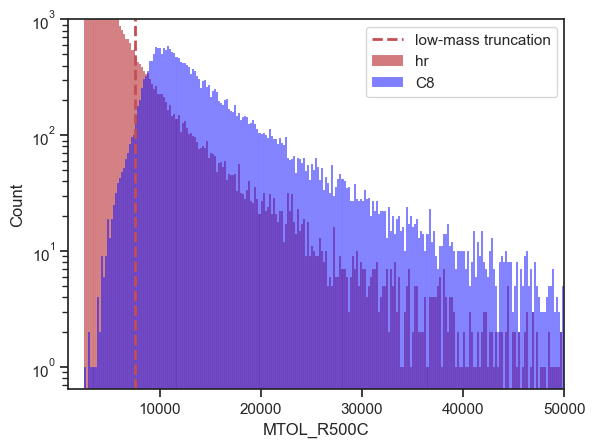

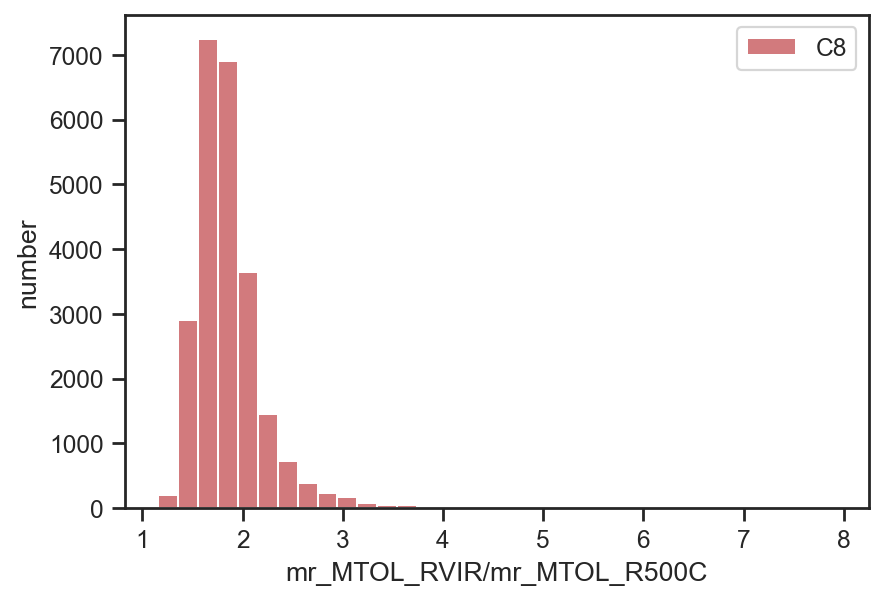

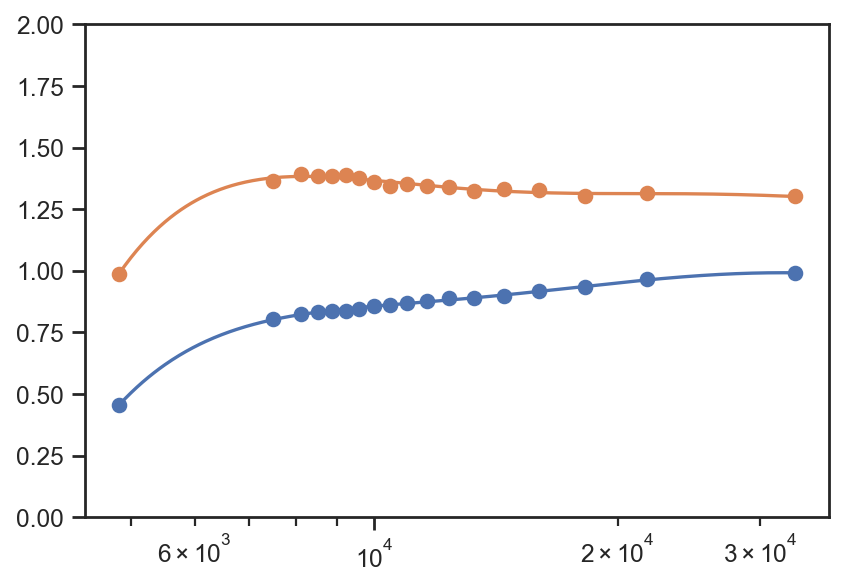

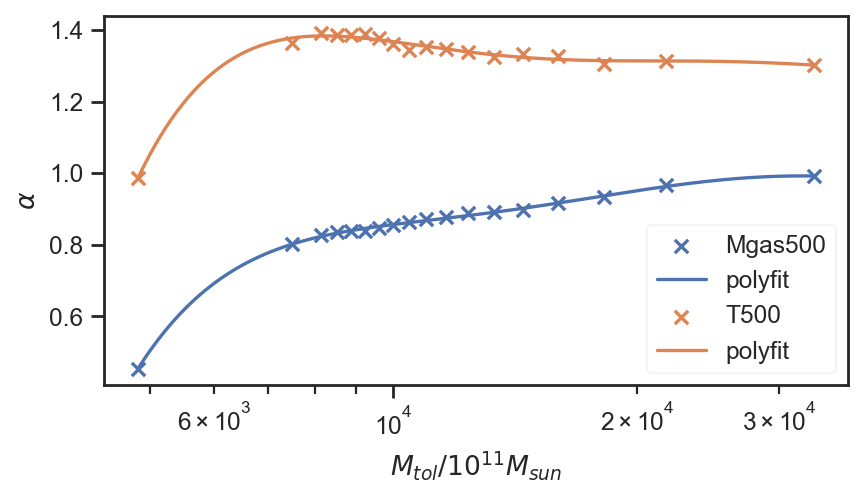

In [4]:
import calibration
import pandas as pd
hr_data = pd.read_csv('./Data/Box2b_hr/cluster.csv')
mr_simualtion = data_preprocessing.read_15mr_simulation()
mr_data, hr_data = calibration.read_calibration_data(mr_simualtion, hr_data)
calibration.extract_calibration_function(mr_data, hr_data, min_bin_size=500, deg=5)
calibration.plot_calibration_function()

In [6]:
import data_preprocessing
import sample_boosting
import model_new
import numpy as np
import plot

eFEDS_cat2, eROSTA_DR1 = data_preprocessing.read_observed_data()
mr_simualtion = data_preprocessing.read_15mr_simulation()
# calculated the 0.5% and 99.5% points
column_rangs = {'R500_kpc':[], 'Mgas500':[], 'Lbol500':[], 'T500':[], 'z':[]}
column_rangs = data_preprocessing.filter_setting(column_rangs, mr_simualtion)

simulation name: mr_0.153_0.0408_0.614_0.666, label: C1
simulation name: mr_0.189_0.0455_0.697_0.703, label: C2
simulation name: mr_0.200_0.0415_0.850_0.730, label: C3
simulation name: mr_0.204_0.0437_0.739_0.689, label: C4
simulation name: mr_0.222_0.0421_0.793_0.676, label: C5
simulation name: mr_0.232_0.0413_0.687_0.670, label: C6
simulation name: mr_0.268_0.0449_0.721_0.699, label: C7
simulation name: mr_0.272_0.0456_0.809_0.704, label: C8
simulation name: mr_0.301_0.0460_0.824_0.707, label: C9
simulation name: mr_0.304_0.0504_0.886_0.740, label: C10
simulation name: mr_0.342_0.0462_0.834_0.708, label: C11
simulation name: mr_0.363_0.0490_0.884_0.729, label: C12
simulation name: mr_0.400_0.0485_0.650_0.675, label: C13
simulation name: mr_0.406_0.0466_0.867_0.712, label: C14
simulation name: mr_0.428_0.0492_0.830_0.732, label: C15


In [7]:
from plot import plot_distribution
import matplotlib.pyplot as plt
import seaborn as sns
# cleaning data, only select the data in the ranges
cleaned_eFEDS_cat2 = data_preprocessing.data_cleaning(eFEDS_cat2, column_rangs)
cleaned_eROSTA_DR1 =  data_preprocessing.data_cleaning(eROSTA_DR1, column_rangs)
mr_simualtion =  data_preprocessing.data_cleaning(mr_simualtion, column_rangs)
# resample the simulation data
resample_mr_simualtion = sample_boosting.simulation_boosting(mr_simualtion, 100000, column_rangs, noise_level=0.01,  ramdom_seed=42)
data = [cleaned_eFEDS_cat2, cleaned_eROSTA_DR1, mr_simualtion]
labels = ['eFEDS', 'eRASS1', 'Simualtions']
plot_distribution(data, labels, column_rangs)
print(len(cleaned_eFEDS_cat2), len(cleaned_eROSTA_DR1))

Mgas500 has error measurement
Lbol500 has error measurement
T500 has error measurement
Mgas500 has error measurement
Lbol500 has error measurement
T500 has error measurement
C1 1238
C10 39869
C11 43924
C12 57978
C13 21043
C14 70221
C15 64299
C2 4761
C3 15183
C4 8610
C5 15710
C6 8033
C7 13454
C8 23900
C9 32237


/Users/apple/Desktop/eROSTA/plot.py:31: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[var], ax=ax, kde=False, label=label, palette='dark', color=color, stat="density", alpha=0.4, binwidth=bw)
/Users/apple/Desktop/eROSTA/plot.py:31: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[var], ax=ax, kde=False, label=label, palette='dark', color=color, stat="density", alpha=0.4, binwidth=bw)
/Users/apple/Desktop/eROSTA/plot.py:31: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[var], ax=ax, kde=False, label=label, palette='dark', color=color, stat="density", alpha=0.4, binwidth=bw)
/Users/apple/Desktop/eROSTA/plot.py:31: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[var], ax=ax, kde=False, label=label, palette='dark', color=color, stat="density", alpha=0.4, binwidth=bw)
/Users/apple/Desktop/eROSTA/

226 2092


###=========

/Users/apple/Desktop/eROSTA/plot.py:31: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[var], ax=ax, kde=False, label=label, palette='dark', color=color, stat="density", alpha=0.4, binwidth=bw)
/Users/apple/Desktop/eROSTA/plot.py:31: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[var], ax=ax, kde=False, label=label, palette='dark', color=color, stat="density", alpha=0.4, binwidth=bw)
/Users/apple/Desktop/eROSTA/plot.py:31: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[var], ax=ax, kde=False, label=label, palette='dark', color=color, stat="density", alpha=0.4, binwidth=bw)
/Users/apple/Desktop/eROSTA/plot.py:31: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[var], ax=ax, kde=False, label=label, palette='dark', color=color, stat="density", alpha=0.4, binwidth=bw)
/Users/apple/Desktop/eROSTA/

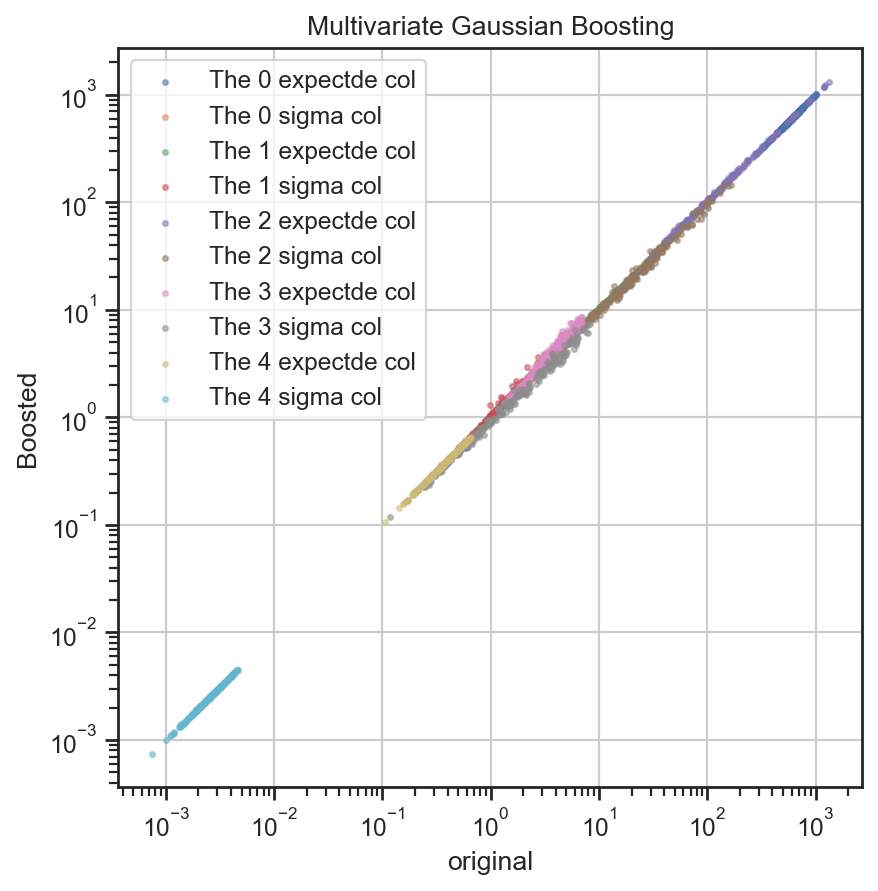

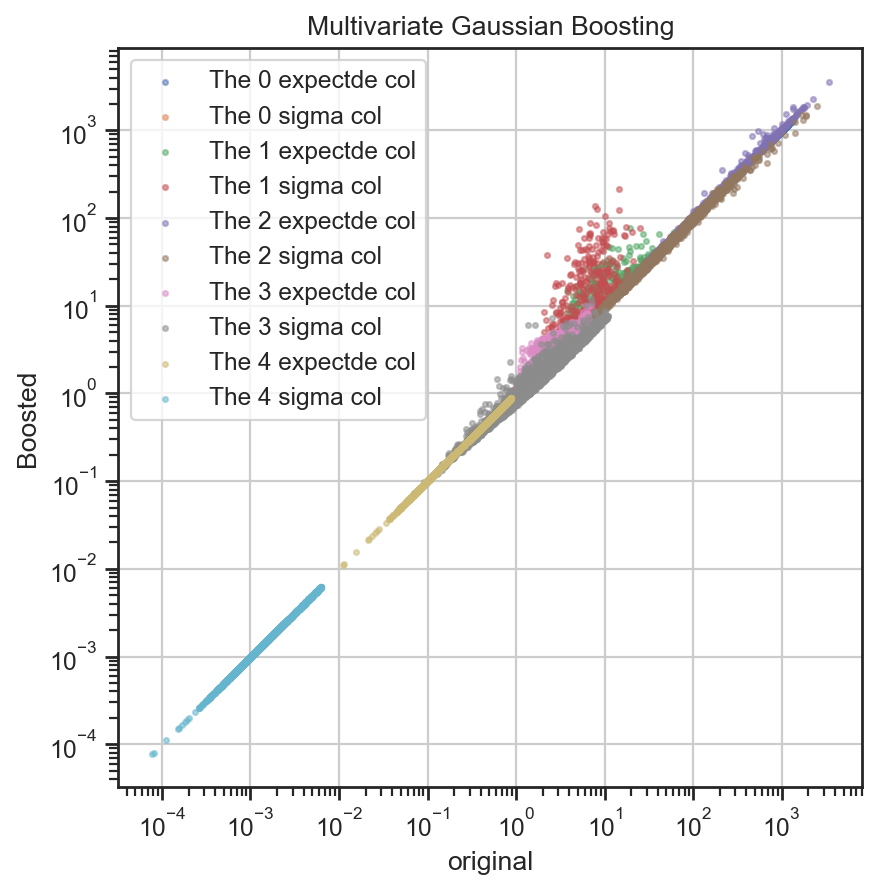

In [8]:
# === the coloum name and error
vars_name = ['R500_kpc', 'Mgas500', 'Lbol500', 'T500', 'z'] # estimate value
up_error  = [1e-2, 'E_Mgas500', 'E_Lbol500', 'E_T500', 1e-2] # error bar
down_error= [1e-2, 'e_Mgas500', 'e_Lbol500', 'e_T500', 1e-2]

boosted_eFEDS, boost_eFEDS = sample_boosting.Boosting(cleaned_eFEDS_cat2, vars_name, up_error, down_error, dis_type='log_normal')
boosted_eROSTA_DR1, boost_DR1 = sample_boosting.Boosting(cleaned_eROSTA_DR1, vars_name, up_error, down_error, num=1000, dis_type='log_normal')
sample_boosting.Display_boosting_results(boosted_eFEDS)
sample_boosting.Display_boosting_results(boosted_eROSTA_DR1)
data = [cleaned_eFEDS_cat2, resample_mr_simualtion, mr_simualtion]
plot_distribution(data, column_rangs)

In [9]:
naive_bayesian = model_new.Naive_Bayesian()
simuation_data = model_new.pre_selection(resample_mr_simualtion)
train_data, valid_data = model_new.data_split(simuation_data)
naive_bayesian.train_data = train_data
naive_bayesian.config['input_column_rangs'] = column_rangs
naive_bayesian.config['bin_num'] = 4
naive_bayesian.calculate_likelihood()
naive_bayesian.test_data = valid_data
#llh = naive_bayesian.posterior()
results = naive_bayesian.points()
ture_label = naive_bayesian.test_data['label'].values
plot.plot_corner(results, ref_point='C8', test_set='Mix', fname=f'Naive_Bayesian_test', show_ref=False, show_cos_name=False)
plot.plot_confusion_matrix(ture_label, results)

{'bin_num': 4,
 'cosmology_label': ['C3',
                     'C4',
                     'C5',
                     'C6',
                     'C7',
                     'C8',
                     'C9',
                     'C10',
                     'C11',
                     'C12',
                     'C13',
                     'C14',
                     'C15'],
 'cosmology_para': [[0.2, 0.85, 0.73, 0.0415],
                    [0.204, 0.739, 0.689, 0.0437],
                    [0.222, 0.793, 0.676, 0.0421],
                    [0.232, 0.687, 0.67, 0.0413],
                    [0.268, 0.721, 0.699, 0.0449],
                    [0.272, 0.809, 0.704, 0.0456],
                    [0.301, 0.824, 0.707, 0.046],
                    [0.304, 0.886, 0.74, 0.0504],
                    [0.342, 0.834, 0.708, 0.0462],
                    [0.363, 0.884, 0.729, 0.049],
                    [0.4, 0.65, 0.675, 0.0485],
                    [0.406, 0.867, 0.712, 0.0466],
                    [0.428

In [10]:
naive_bayesian.test_data = boost_DR1
results = naive_bayesian.points()
refe_para = naive_bayesian.config['cosmology_para'][7]
plot.plot_corner(results, 'C8', 'boost_DR1', fname='Naive_Bayesian_DR1', show_ref=False, show_cos_name=False)

{'bin_num': 4,
 'cosmology_label': ['C3',
                     'C4',
                     'C5',
                     'C6',
                     'C7',
                     'C8',
                     'C9',
                     'C10',
                     'C11',
                     'C12',
                     'C13',
                     'C14',
                     'C15'],
 'cosmology_para': [[0.2, 0.85, 0.73, 0.0415],
                    [0.204, 0.739, 0.689, 0.0437],
                    [0.222, 0.793, 0.676, 0.0421],
                    [0.232, 0.687, 0.67, 0.0413],
                    [0.268, 0.721, 0.699, 0.0449],
                    [0.272, 0.809, 0.704, 0.0456],
                    [0.301, 0.824, 0.707, 0.046],
                    [0.304, 0.886, 0.74, 0.0504],
                    [0.342, 0.834, 0.708, 0.0462],
                    [0.363, 0.884, 0.729, 0.049],
                    [0.4, 0.65, 0.675, 0.0485],
                    [0.406, 0.867, 0.712, 0.0466],
                    [0.428

In [11]:
randomforest = model_new.RandomForest()
simuation_data = model_new.pre_selection(resample_mr_simualtion)
train_data, valid_data = model_new.data_split(simuation_data)
randomforest.train_data = train_data
randomforest.config['input_column_rangs'] = column_rangs
randomforest.training()
randomforest.test_data = valid_data
#probs = randomforest.probability(show_acc=True)
results = randomforest.points(show_acc=True)
ture_label = randomforest.test_data['label'].values
plot.plot_corner(results, ref_point='C8', test_set='Mix', fname='RandomForest_test',show_ref=False, show_cos_name=False)
plot.plot_confusion_matrix(ture_label, results)

Num of x_train 1170000, number of y_train 1170000
training finished!
{'bin_num': 5,
 'class_weight': 'balanced',
 'cosmology_label': ['C3',
                     'C4',
                     'C5',
                     'C6',
                     'C7',
                     'C8',
                     'C9',
                     'C10',
                     'C11',
                     'C12',
                     'C13',
                     'C14',
                     'C15'],
 'cosmology_para': [[0.2, 0.85, 0.73, 0.0415],
                    [0.204, 0.739, 0.689, 0.0437],
                    [0.222, 0.793, 0.676, 0.0421],
                    [0.232, 0.687, 0.67, 0.0413],
                    [0.268, 0.721, 0.699, 0.0449],
                    [0.272, 0.809, 0.704, 0.0456],
                    [0.301, 0.824, 0.707, 0.046],
                    [0.304, 0.886, 0.74, 0.0504],
                    [0.342, 0.834, 0.708, 0.0462],
                    [0.363, 0.884, 0.729, 0.049],
                    [0.4, 0

In [14]:
randomforest.test_data = boost_DR1[0:]
randomforest.test_data = randomforest.test_data[randomforest.test_data['z'] < 0.4]
randomforest.config['weight'] = True
randomforest.config['p_threshold'] = 0.0
results = randomforest.points()
plot.plot_corner(results, ref_point='C8', test_set='boost_DR1', fname=f'RandomForest_DR1',show_ref=False, show_cos_name=False)

{'bin_num': 5,
 'class_weight': 'balanced',
 'cosmology_label': ['C3',
                     'C4',
                     'C5',
                     'C6',
                     'C7',
                     'C8',
                     'C9',
                     'C10',
                     'C11',
                     'C12',
                     'C13',
                     'C14',
                     'C15'],
 'cosmology_para': [[0.2, 0.85, 0.73, 0.0415],
                    [0.204, 0.739, 0.689, 0.0437],
                    [0.222, 0.793, 0.676, 0.0421],
                    [0.232, 0.687, 0.67, 0.0413],
                    [0.268, 0.721, 0.699, 0.0449],
                    [0.272, 0.809, 0.704, 0.0456],
                    [0.301, 0.824, 0.707, 0.046],
                    [0.304, 0.886, 0.74, 0.0504],
                    [0.342, 0.834, 0.708, 0.0462],
                    [0.363, 0.884, 0.729, 0.049],
                    [0.4, 0.65, 0.675, 0.0485],
                    [0.406, 0.867, 0.712, 0.0466

In [13]:
randomforest.test_data = boost_DR1[0:]
randomforest.test_data = randomforest.test_data[randomforest.test_data['z'] >= 0.4]
randomforest.config['weight'] = True
randomforest.config['p_threshold'] = 0.0
results = randomforest.points()
plot.plot_corner(results, ref_point='C8', test_set='boost_DR1', fname=f'RandomForest_DR1',show_ref=False, show_cos_name=False)

{'bin_num': 5,
 'class_weight': 'balanced',
 'cosmology_label': ['C3',
                     'C4',
                     'C5',
                     'C6',
                     'C7',
                     'C8',
                     'C9',
                     'C10',
                     'C11',
                     'C12',
                     'C13',
                     'C14',
                     'C15'],
 'cosmology_para': [[0.2, 0.85, 0.73, 0.0415],
                    [0.204, 0.739, 0.689, 0.0437],
                    [0.222, 0.793, 0.676, 0.0421],
                    [0.232, 0.687, 0.67, 0.0413],
                    [0.268, 0.721, 0.699, 0.0449],
                    [0.272, 0.809, 0.704, 0.0456],
                    [0.301, 0.824, 0.707, 0.046],
                    [0.304, 0.886, 0.74, 0.0504],
                    [0.342, 0.834, 0.708, 0.0462],
                    [0.363, 0.884, 0.729, 0.049],
                    [0.4, 0.65, 0.675, 0.0485],
                    [0.406, 0.867, 0.712, 0.0466

C1 1238
C10 39869
C11 43924
C12 57978
C13 21043
C14 70221
C15 64299
C2 4761
C3 15183
C4 8610
C5 15710
C6 8033
C7 13454
C8 23900
C9 32237


(array([[ 49.426487 , -53.445293 ],
        [-24.050953 , -51.1415   ],
        [ -5.1685333,  23.520124 ],
        ...,
        [ 87.78643  ,  -3.7472394],
        [ 70.453476 , -41.82618  ],
        [-73.77507  , -12.708502 ]], dtype=float32),
 <Column name='label' dtype='int64' length=15000>
   2
  11
   1
   2
   8
  13
  11
  14
  12
   8
   6
   3
 ...
   6
  14
   3
   1
   6
   1
  12
  15
  12
  12
   7)

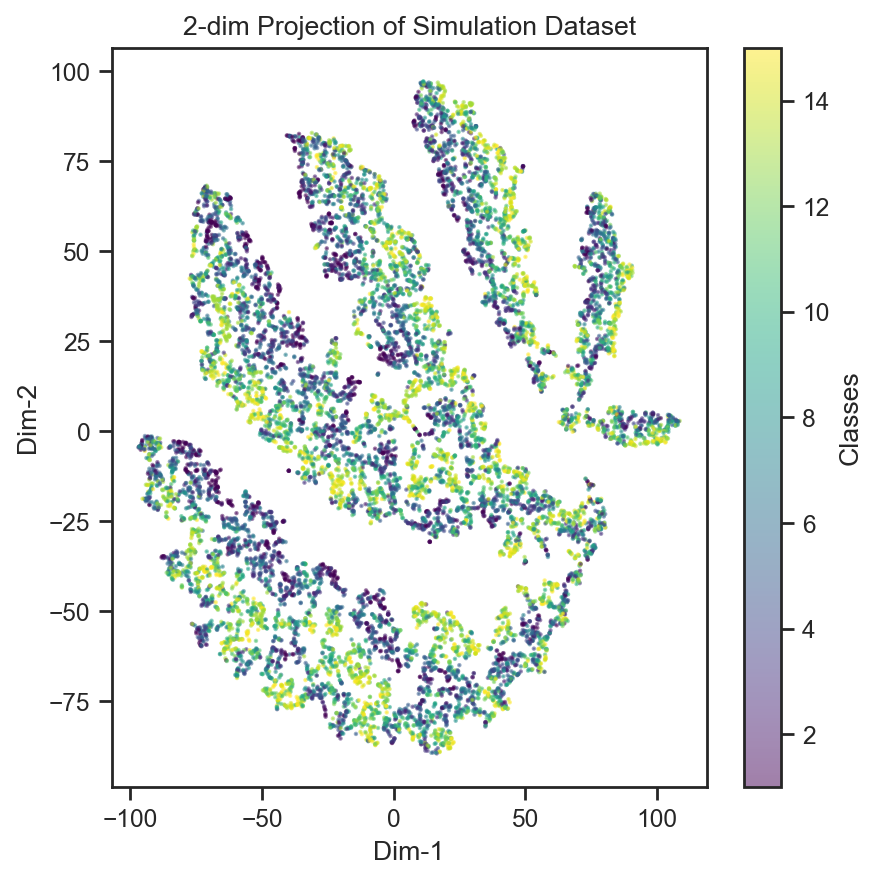

In [10]:
from sklearn.preprocessing import StandardScaler
import umap
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def two_dim_projection(data, vars_name, reducer_type='tSNE'):
    pandas_table = data[vars_name].to_pandas()
    X = pandas_table[vars_name].values
    X = StandardScaler().fit_transform(X)
    Y = data['label']
    labels = [f'C{i+1}' for i in range(15)]
    for label, i in zip(labels, np.arange(15)+1):
        mask = (Y == label)
        Y[mask] = i
    Y = Y.astype('int')
    # UMAP reducing
    if reducer_type=='tSNE':
        reducer = TSNE(n_components=2, random_state=42)
    elif reducer_type=='UMAP':
        reducer = umap.UMAP(n_neighbors=10, min_dist=0.1, n_components=2, random_state=42)
    embedding = reducer.fit_transform(X)
    fig, ax = plt.subplots(1, 1, figsize=(6, 6), dpi=160)
    plt.scatter(embedding[:, 0], embedding[:, 1], c=Y, cmap="viridis", s=1, alpha=0.5)
    plt.xlabel('Dim-1')
    plt.ylabel('Dim-2')
    plt.colorbar(label="Classes")
    plt.title("2-dim Projection of Simulation Dataset")
    plt.savefig('./figures/2_dim_projection.jpg', bbox_inches='tight', pad_inches=0.1)
    return embedding, Y

projected_simualtion = sample_boosting.simulation_boosting(mr_simualtion, 1000, column_rangs, noise_level=0.01,  ramdom_seed=42)
two_dim_projection(projected_simualtion, vars_name, reducer_type='tSNE')

calculating the CFD of C1
calculating the CFD of C2
calculating the CFD of C3
calculating the CFD of C4
calculating the CFD of C5
calculating the CFD of C6
calculating the CFD of C7
calculating the CFD of C8
calculating the CFD of C9
calculating the CFD of C10
calculating the CFD of C11
calculating the CFD of C12
calculating the CFD of C13
calculating the CFD of C14
calculating the CFD of C15


{'C1': array([0.        , 0.23667205, 0.51211632, 0.69386107, 0.78513732,
        0.84894992, 0.91114701, 0.9361874 , 0.95476575, 0.9644588 ,
        0.97415186, 0.98384491, 0.98788368, 0.98869144, 0.98869144,
        0.99030695, 0.99192246, 0.99192246, 0.99273021, 0.99353796,
        0.99353796, 0.99434572, 0.99515347, 0.99676898, 0.99676898,
        0.99757674, 0.99757674, 0.99757674, 0.99757674, 0.99757674,
        0.99757674, 0.99757674, 0.99757674, 0.99757674, 0.99757674,
        0.99757674, 0.99757674, 0.99757674, 0.99757674, 0.99838449,
        0.99919225, 0.99919225, 0.99919225, 0.99919225, 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ]),
 'C2': array([0.        , 0.10249947, 0.35118673, 0.58202058, 0.70174333,
        0.78428901, 0.85108171, 0.89708045, 0.92522579, 0.9458097 ,
        0.96093258, 0.97185465, 0.97857593, 0.98529721, 0.98781769,
        0.98970804, 0.99117832, 0.99222852, 0.99390884, 0.99537912,
        0.9957992 , 0.99663936, 0.

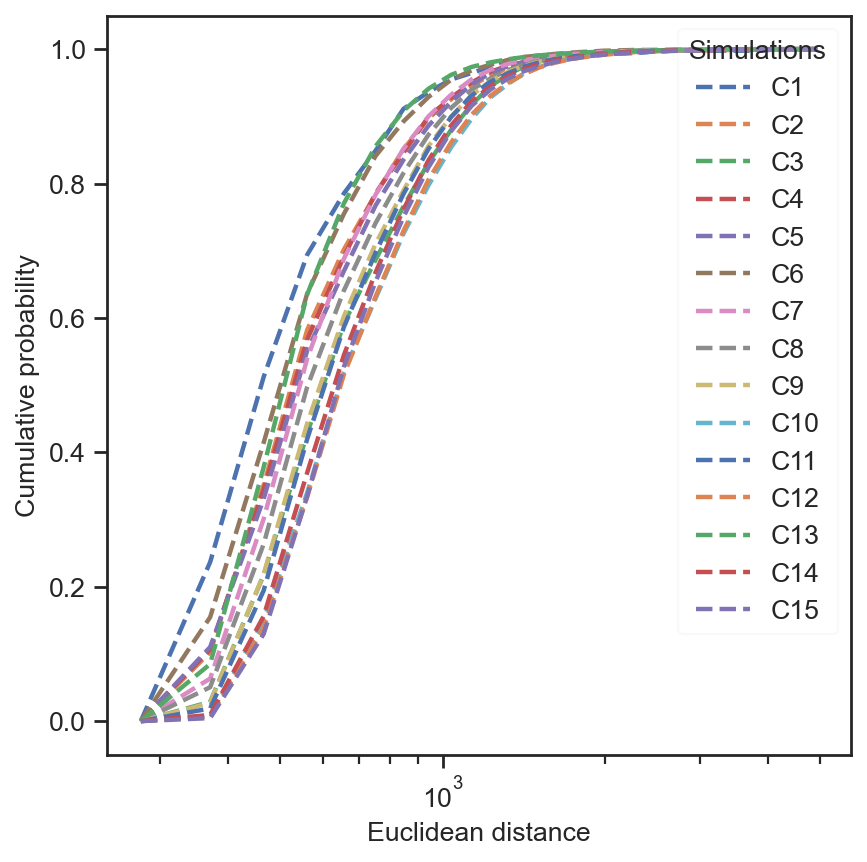

In [11]:
import matplotlib.ticker as mtick
import seaborn as sns
import os
sns.set_theme(style="ticks", palette="deep")

def calculate_CFD(data):
    # calculate the CFD of each simulation
    a = 0
    for name in vars_name:
        a = a + mr_simualtion[name]**2
    a = a**0.5
    mr_simualtion['Euclidean_distance'] = a
    labels = [f'C{i+1}' for i in range(15)]
    check_points = np.linspace(min(a), max(a), 50)
    CFD = {}
    for label in labels:
        print(f'calculating the CFD of {label}')
        subset = mr_simualtion[(mr_simualtion['label']==label)]
        portion_point = []
        for point in check_points:
            num = sum(subset['Euclidean_distance']<=point)
            portion_point.append(num)
        portion_point = np.array(portion_point)/len(subset)
        CFD[label] = portion_point
    # plot the CFD 
    fig, ax = plt.subplots(1, 1, figsize=(6, 6), dpi=160)
    f_size = 12
    ax.set_xlabel('Euclidean distance')
    ax.set_ylabel('Cumulative probability', fontsize=f_size)
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f')) #Keep one decimal place
    ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f')) #Keep one decimal place
    ax.tick_params(axis='x', labelsize=f_size)
    ax.tick_params(axis='y', labelsize=f_size)
    for name, cfd in CFD.items():
        ax.plot(check_points, cfd, linewidth=2.0, alpha=1.0, label=name,linestyle='--')
    ax.legend(title=f'Simulations', loc='upper right', framealpha=0.1, fontsize=f_size)
    plt.xscale('log')
    plt.xticks(fontsize=f_size)
    plt.yticks(fontsize=f_size)
    plt.savefig('figures/CFD.pdf',bbox_inches='tight')
    return CFD

calculate_CFD(mr_simualtion)

torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size(

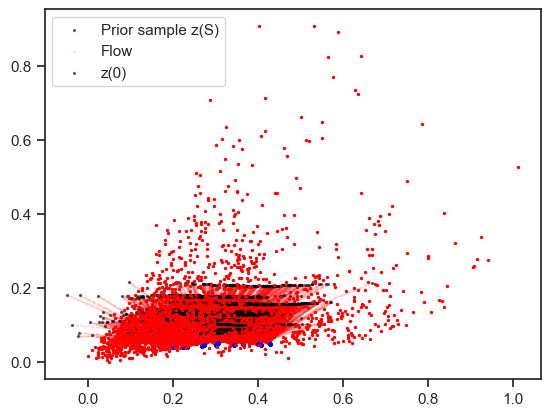

torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size(

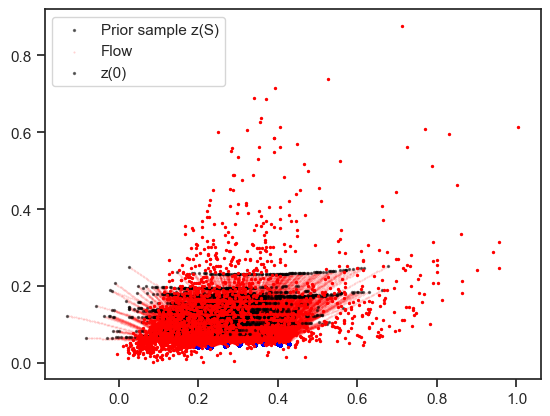

torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size(

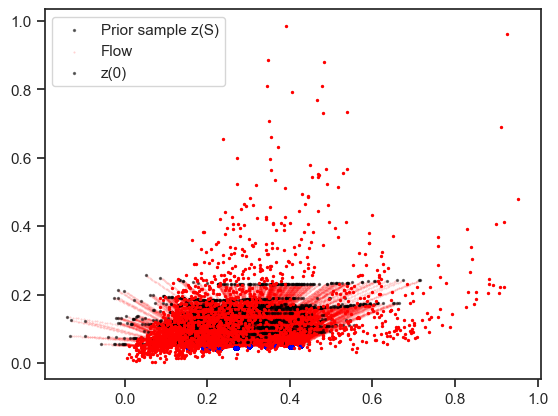

torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size([20000, 5])
torch.Size([20000, 5]) torch.Size(

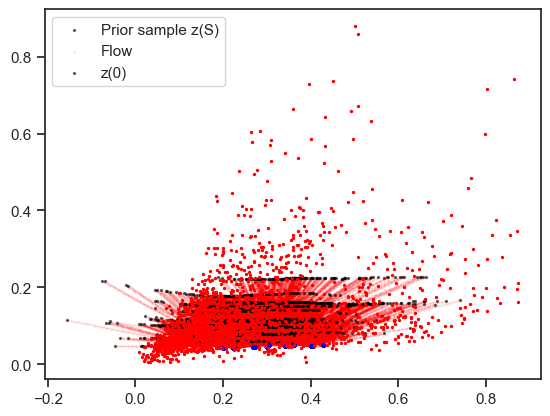

In [7]:
import math
import os
import time
import matplotlib.pyplot as plt
import numpy as np
import ot as pot
import torch
import torchdyn
from torchdyn.core import NeuralODE
from torchcfm.conditional_flow_matching import *
from torchcfm.models.models import *
from torchcfm.utils import *

class MLP(torch.nn.Module):
    def __init__(self, dim, out_dim=None, w=64, time_varying=False):
        super().__init__()
        self.time_varying = time_varying
        if out_dim is None:
            out_dim = dim
        self.net = torch.nn.Sequential(
            torch.nn.Linear(dim + (1 if time_varying else 0), w),
            torch.nn.SELU(),
            torch.nn.Linear(w, w),
            torch.nn.SELU(),
            torch.nn.Linear(w, w),
            torch.nn.SELU(),
            torch.nn.Linear(w, out_dim),
        )

    def forward(self, x):
        return self.net(x)

def plot_trajectories(traj, x0, x1):
    """Plot trajectories of some selected samples."""
    #plt.figure(figsize=(6, 6))
    n = 2000
    plt.scatter(traj[0, :n, 0], traj[0, :n, 1], s=2, alpha=0.5, c="black")
    plt.scatter(traj[:, :n, 0], traj[:, :n, 1], s=0.2, alpha=0.2, c="red")
    plt.scatter(traj[-1, :n, 0], traj[-1, :n, 1], s=2, alpha=0.5, c="black")

    plt.scatter(x0[:n, 0], x0[ :n, 1], s=2, alpha=1, c="blue")
    plt.scatter(x1[:n, 0], x1[ :n, 1], s=2, alpha=1, c="red")
    plt.legend(["Prior sample z(S)", "Flow", "z(0)"])
    #plt.xlim(0,1)
    #plt.ylim(0,1)
    plt.show()

def transform(table_data):

    sampled_data = table_data.to_pandas()

    
    x1_names = column_rangs
    for col_name, col_range in x1_names.items():
        sampled_data[col_name] = (sampled_data[col_name]-col_range[0])/(col_range[1]-col_range[0])
    x1 = sampled_data[x1_names.keys()].values

    x0_names = {'Omega':[0.1530, 0.4280],'OmegaB':[0.0408, 0.0504],'Sigm8':[0.6140, 0.8860],'Hubble':[0.6660, 0.7400]}
    for col_name, col_range in x0_names.items():
        #sampled_data[col_name] = (sampled_data[col_name]-col_range[0])/(col_range[1]-col_range[0])
        sampled_data[col_name] = sampled_data[col_name]
    x0 = sampled_data[x0_names.keys()].values
    return x0, x1

batch_size = 20000
dim = 5

def sample_x0_x1(batch_size=10000):
    #x0 = torch.normal(mean=0, std=1, size=(1000,dim))
    #x1 = x0**2 + torch.normal(mean=0, std=0.1, size=(1000,dim))
    row_indices = np.random.choice(len(resample_mr_simualtion), size=batch_size, replace=True)
    sampled_data = resample_mr_simualtion[row_indices]
    x0, x1 = transform(sampled_data)
    x_0_name = ['Omega','OmegaB','Sigm8','Hubble']
    ramdom_seed = np.random.normal(loc=0, scale=0.01, size=(x0.shape[0], x1.shape[1]-x0.shape[1]))
    x0 = np.concatenate([x0, ramdom_seed], axis=-1)
    x0, x1 =  torch.from_numpy(x0.astype(np.float32)), torch.from_numpy(x1.astype(np.float32))
    print(x0.shape, x1.shape)
    return x0, x1

model = MLP(dim=dim, time_varying=True)
optimizer = torch.optim.Adam(model.parameters())
FM = ConditionalFlowMatcher(sigma=0.01)
#FM = SchrodingerBridgeConditionalFlowMatcher(sigma=0.01, ot_method="exact")

start = time.time()

for k in range(2000):
    optimizer.zero_grad()

    x0, x1 = sample_x0_x1(batch_size=batch_size)
    t, xt, ut = FM.sample_location_and_conditional_flow(x0, x1)
    vt = model(torch.cat([xt, t[:, None]], dim=-1))
    loss = torch.mean((vt - ut) ** 2)

    loss.backward()
    optimizer.step()
 
    if (k + 1) % 500 == 0:
        end = time.time()
        print(f"{k+1}: loss {loss.item():0.3f} time {(end - start):0.2f}")
        start = end
        node = NeuralODE(torch_wrapper(model), solver="dopri5", sensitivity="adjoint", atol=1e-4, rtol=1e-4)
        with torch.no_grad():
            x0, x1 = sample_x0_x1(batch_size=batch_size)
            traj = node.trajectory(x0, t_span=torch.linspace(0, 1, 100))
            plot_trajectories(traj.cpu().numpy(), x0, x1)

torch.Size([10000, 5]) torch.Size([10000, 5])


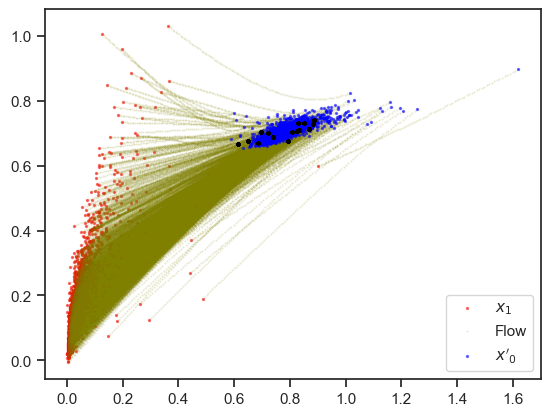

In [22]:
def plot_trajectories(traj, x0, x1):
    """Plot trajectories of some selected samples."""
    #plt.figure(figsize=(6, 6))
    n = 2000
    plt.scatter(traj[0, :n, -3], traj[0, :n, -2], s=2, alpha=0.5, c="red")
    plt.scatter(traj[:, :n, -3], traj[:, :n, -2], s=0.2, alpha=0.2, c="olive")
    plt.scatter(traj[-1, :n, -3], traj[-1, :n, -2], s=2, alpha=0.5, c="blue")

    plt.scatter(x0[:n, -3], x0[ :n, -2], s=2, alpha=1, c="black")
    #plt.scatter(x1[:n, -3], x1[ :n, -2], s=2, alpha=1, c="red")
    plt.legend(["$x_1$", "Flow", "$x'_0$"])
    #plt.xlim(0,1)
    #plt.ylim(0,1)
    plt.show()

node = NeuralODE(torch_wrapper(model), solver="dopri5", sensitivity="adjoint", atol=1e-4, rtol=1e-4)
with torch.no_grad():
    x0, x1 = sample_x0_x1(batch_size=10000)
    traj = node.trajectory(x1, t_span=torch.linspace(1, 0, 100),)
    plot_trajectories(traj.cpu().numpy(), x0, x1)

In [11]:
mr_simualtion[['Omega', 'OmegaB', 'Sigm8', 'Hubble']]

Omega,OmegaB,Sigm8,Hubble
float64,float64,float64,float64
0.153,0.0408,0.614,0.666
0.153,0.0408,0.614,0.666
0.153,0.0408,0.614,0.666
0.153,0.0408,0.614,0.666
0.153,0.0408,0.614,0.666
0.153,0.0408,0.614,0.666
0.153,0.0408,0.614,0.666
0.153,0.0408,0.614,0.666
0.153,0.0408,0.614,0.666


In [8]:
col_nale = [f'likelihood_C{i+1}' for i in range(15)]
a = naive_bayesian.test_data[col_nale].values
np.sum(a, axis=-1)

array([ 1.,  1.,  1., nan,  1.,  1.,  1.,  1.,  1.,  1.])

In [11]:
simulation_label = np.unique(naive_bayesian.train_data['label'])
simulation_label = np.sort(simulation_label)
sim_para = []
for label in simulation_label:
    para = naive_bayesian.train_data[naive_bayesian.train_data['label']==label][0:1][['Omega', 'OmegaB', 'Sigm8', 'Hubble']]
    sim_para.append(para)
sim_para = np.vstack(sim_para)

prob_lable = [f'likelihood_{lable}' for lable in simulation_label]
prob = naive_bayesian.test_data[prob_lable].values
prob_std = np.std(prob, axis=-1)
point_weight = prob_std
point_value = np.matmul(prob, sim_para)

In [12]:
point_value

array([[0.30270833, 0.0454525 , 0.72085833, 0.68368333],
       [0.30270833, 0.0454525 , 0.72085833, 0.68368333],
       [0.34878922, 0.04733679, 0.83606418, 0.71659405],
       ...,
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ]])